This exercise relates to the College data set, which can be found in the
file [`College.csv`](https://www.statlearning.com/s/College.csv) on the
ISL book website. It contains a number of variables for 777 different
universities and colleges in the US. The variables are

-   `Private` : Public/private indicator

-   `Apps` : Number of applications received

-   `Accept` : Number of applicants accepted

-   `Enroll` : Number of students enrolled

-   `Top10perc` : New students from top 10 % of high school class

-   `Top25perc` : New students from top 25 % of high school class

-   `F.Undergrad` : Number of full-time undergraduates

-   `P.Undergrad` : Number of part-time undergraduates

-   `Outstate` : Out-of-state tuition

-   `Room.Board` : Room and board costs

-   `Books` : Estimated book costs

-   `Personal` : Estimated personal spending

-   `PhD` : Percent of faculty with Ph.D.'s

-   `Terminal` : Percent of faculty with terminal degree

-   `S.F.Ratio` : Student/faculty ratio

-   `perc.alumni` : Percent of alumni who donate

-   `Expend` : Instructional expenditure per student

-   `Grad.Rate` : Graduation rate

a.  Use the `pd.read_csv` function to load the data. Call the loaded
    data `college`, for example

        import urllib
        url = "https://www.statlearning.com/s/College.csv"
        with urllib.request.urlopen(url) as f:
          college = pd.read_csv(f, index_col=0)

    

In [2]:
import pandas as pd
url = "https://www.statlearning.com/s/College.csv"
college = pd.read_csv(url, index_col=0)

In [28]:
import statsmodels.datasets as smd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [34]:
col = smd.get_rdataset('College', 'ISLR')
col?
col.data
col.package, col.title

('ISLR', "U.S. News and World Report's College Data")

b.  Look at the data using the `head` method. You should notice that the
    row index is just the name of each university. This is the effect of
    `index_col=0`.


In [3]:
    college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


c.  Use the `describe` function to produce a numerical summary of the
    variables in the data set.


In [4]:
    college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


d.  Use the `pair_plot` function from the `seaborn` package to produce a
    scatterplot matrix of the first ten columns or variables of the
    data. Recall that you can reference the first ten columns of a
    `pandas.DataFrame` by applying the `.iloc(1)[:10]` method on it.

    Note that `Private` is missing from the plot. Why?

    

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


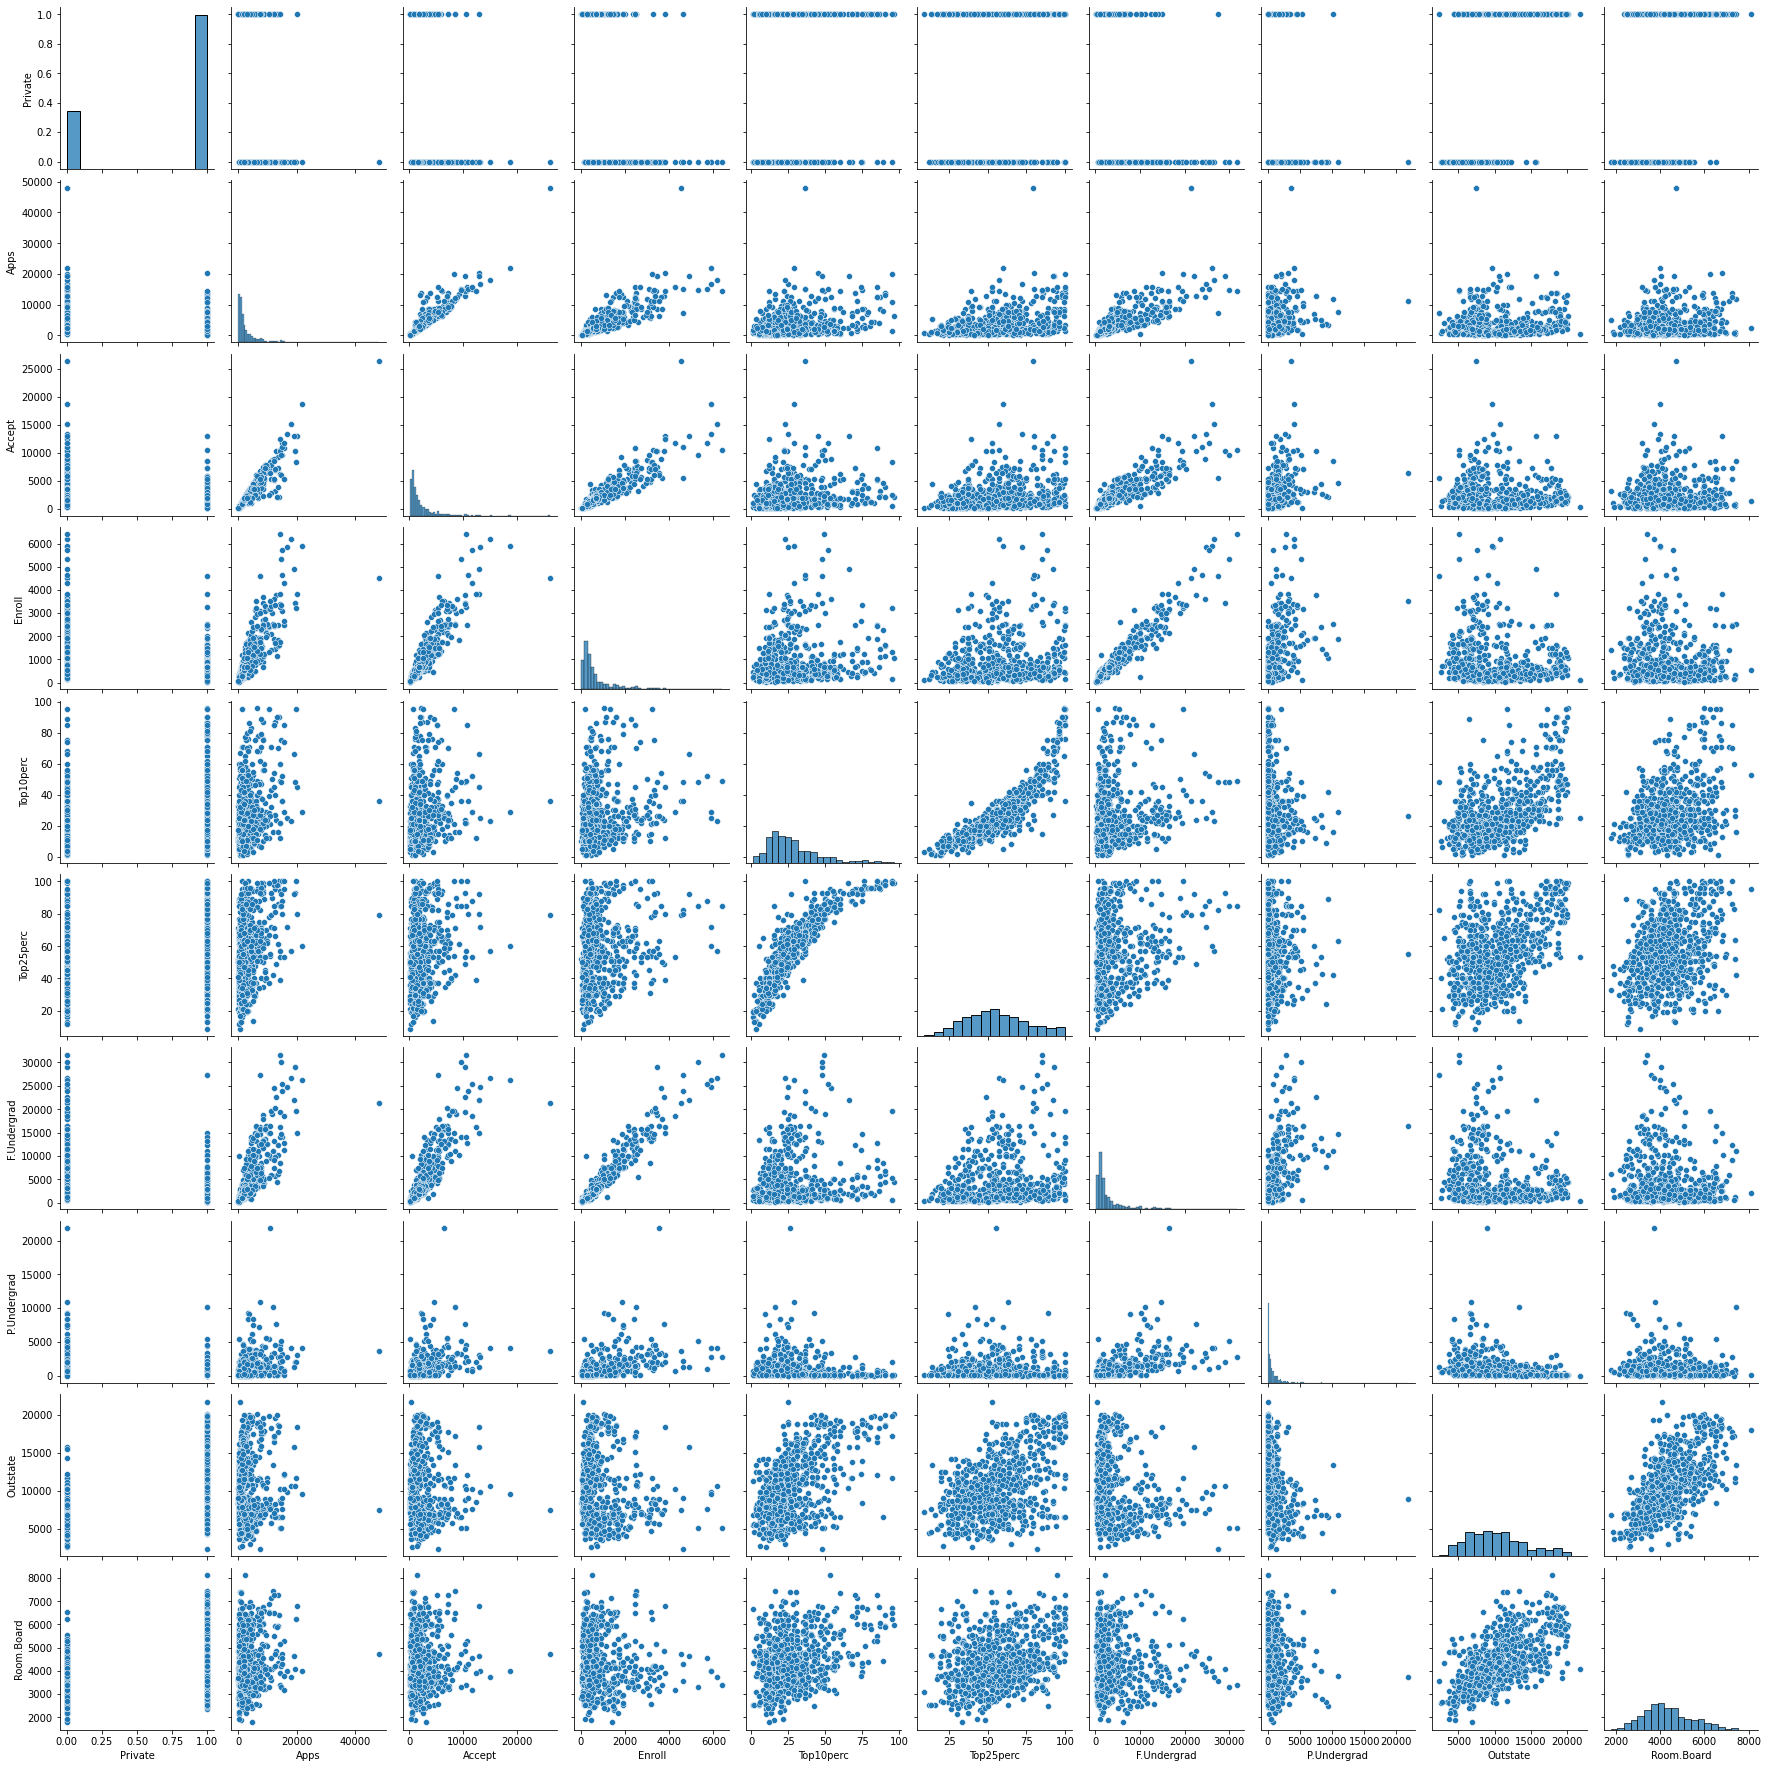

In [7]:

smalldf = college.iloc(1)[:10]
smalldf['Private'] = 1*(smalldf.Private=='Yes')
sns.pairplot(smalldf)

e.  Use the `seaborn.boxplot` function to produce side-by-side boxplots
    of `Outstate` versus `Private`.


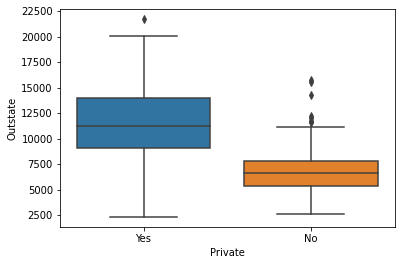

In [8]:
sns.boxplot(x='Private', y='Outstate', data=college) 

f. Create a new qualitative variable, called `Elite`, by binning the
   `Top10perc` variable. We are going to divide universities into two
   groups based on whether or not the proportion of students coming
   from the top 10 % of their high school classes exceeds 50 %.

        college["Elite"] = college.Top10perc>50

   Use the `.value_counts` method to see how many elite universities
   there are. Now use the `boxplot()` function from the `seaborn`
   package to produce side-by-side boxplots of `Outstate` versus
   `Elite`.

    

False    699
True      78
Name: Elite, dtype: int64


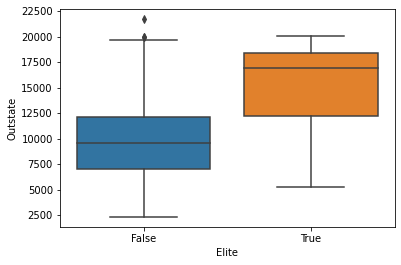

In [14]:
 college["Elite"] = college.Top10perc>50
 print(college.Elite.value_counts())
 sns.boxplot(x='Elite', y='Outstate', data=college)
 plt.show()


g.  Use the `.hist` method to produce some histograms with differing
    numbers of bins for a few of the quantitative variables.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1f66b1fd0>]],
      dtype=object)

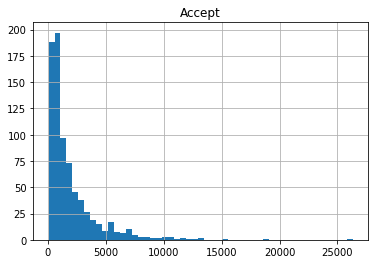

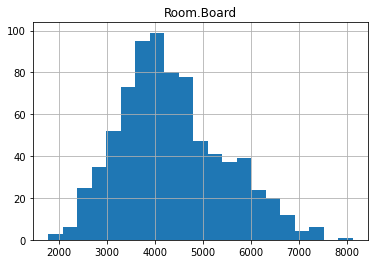

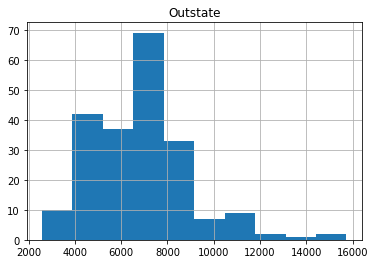

In [27]:
college.hist('Accept', bins=51)
college.hist('Room.Board', bins=21)
college[college.Private!='Yes'].hist('Outstate')

h.  Continue exploring the data, and provide a brief summary of what you
    discover.
